In [1]:
import sys
import itertools
import numpy as np

#!pip install torch===1.0.1 -f https://download.pytorch.org/whl/torch_stable.html

import torch
from torch.utils.data import TensorDataset, DataLoader

import anfis
from membership import BellMembFunc, make_bell_mfs, GaussMembFunc, make_gauss_mfs
from experimental import train_anfis, test_anfis

dtype = torch.float

from matplotlib import pyplot as plt
from matplotlib import cm
from matplotlib.ticker import FormatStrFormatter


%matplotlib inline


In [19]:
def sin(x):
    return np.sin(x)

def noise(x, n = 0, m = 0.1):
    noise = np.random.normal(n, m, x.shape)
    return noise

def sin_noise(x, error = 0.1):
    y = sin(x)
    y = y + noise(y)
    return y

def plot(x, y):
    plt.plot(x,y,'ro', label = 'Input data')
    plt.legend(loc="upper right")
    plt.show()

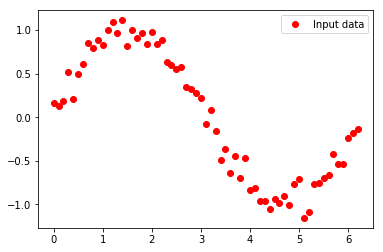

### Training for 20 epochs, training size = 63 cases
epoch    0: MSE=0.26776, RMSE=0.51746 =66.46%
epoch    1: MSE=0.26703, RMSE=0.51675 =66.25%
epoch    2: MSE=0.26476, RMSE=0.51455 =63.89%
epoch    3: MSE=0.26648, RMSE=0.51622 =64.74%
epoch    4: MSE=0.26426, RMSE=0.51407 =60.96%
epoch    5: MSE=0.26421, RMSE=0.51401 =60.93%
epoch    6: MSE=0.26107, RMSE=0.51095 =60.09%
epoch    7: MSE=0.25267, RMSE=0.50266 =57.74%
epoch    8: MSE=0.24090, RMSE=0.49081 =55.57%
epoch    9: MSE=0.20408, RMSE=0.45175 =51.69%
epoch   10: MSE=0.15355, RMSE=0.39185 =46.98%
epoch   11: MSE=0.06117, RMSE=0.24733 =39.59%
epoch   12: MSE=0.12485, RMSE=0.35334 =65.86%
epoch   13: MSE=0.12197, RMSE=0.34924 =65.67%
epoch   14: MSE=0.11807, RMSE=0.34361 =64.83%
epoch   15: MSE=0.11322, RMSE=0.33648 =63.46%
epoch   16: MSE=0.10748, RMSE=0.32784 =62.20%
epoch   17: MSE=0.10044, RMSE=0.31692 =62.23%
epoch   18: MSE=0.09215, RMSE=0.30356 =62.07%
epoch   19: MSE=0.08254, RMSE=0.28729 =61.11%


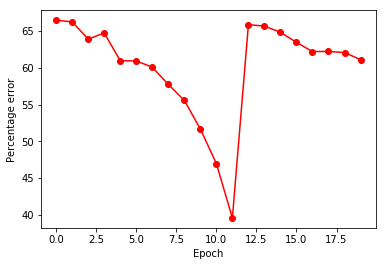

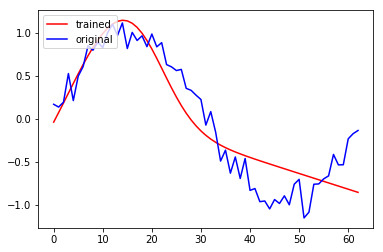

In [22]:
def make_sin_x(batch_size=1024, noise = 0.1):
    '''
        Generates a set of (x) values for the sin function.
    '''
    pts = torch.arange(0, 2*np.pi, 0.1)
    x = torch.tensor(list(itertools.product(pts)), dtype=dtype)
    if bool(noise):
        y_ = [[sin_noise(p, noise)] for p in x]
        y = torch.tensor(y_, dtype=dtype)
    else:
        y_ = [[sin(p)] for p in x]
        y = torch.tensor(y_, dtype=dtype)
    plot(x,y)
    td = TensorDataset(x, y)
    return DataLoader(td, batch_size=batch_size, shuffle=True)

def model_sin():
    invardefs = [
            ('x0', make_gauss_mfs(0.1, [1.0,2.0]))
            ]
    outvars = ['y0']
    anf = anfis.AnfisNet('Jang\'s example 1', invardefs, outvars)
    return anf


#define the model with noise
model = model_sin()
train_data = make_sin_x(batch_size=10, noise = 0.1)
train_anfis(model, train_data, 20, True)


